<a href="https://colab.research.google.com/github/emanbilal780/Excelerate/blob/main/Excelerate_Data_Visulaization.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
from google.colab import files

uploaded= files.upload()

import pandas as pd

df = pd.read_csv("Cleaned_Preprocessed_Dataset_Week1.csv")

# Display basic info to verify successful load
df.info(), df.head()

Saving Cleaned_Preprocessed_Dataset_Week1.csv to Cleaned_Preprocessed_Dataset_Week1.csv
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7800 entries, 0 to 7799
Data columns (total 19 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   Learner SignUp DateTime  7518 non-null   object 
 1   Opportunity Id           7800 non-null   object 
 2   Opportunity Name         7800 non-null   object 
 3   Opportunity Category     7800 non-null   object 
 4   Opportunity End Date     6638 non-null   object 
 5   First Name               7800 non-null   object 
 6   Date of Birth            7800 non-null   object 
 7   Gender                   7800 non-null   object 
 8   Country                  7800 non-null   object 
 9   Institution Name         7800 non-null   object 
 10  Current/Intended Major   7795 non-null   object 
 11  Entry created at         7800 non-null   object 
 12  Status Description       7800 non-null   obj

(None,
   Learner SignUp DateTime                  Opportunity Id  \
 0     2023-06-14 12:30:35  00000000-0GN2-A0AY-7XK8-C5FZPP   
 1     2023-05-01 05:29:16  00000000-0GN2-A0AY-7XK8-C5FZPP   
 2     2023-04-09 20:35:08  00000000-0GN2-A0AY-7XK8-C5FZPP   
 3     2023-08-29 05:20:03  00000000-0GN2-A0AY-7XK8-C5FZPP   
 4     2023-01-06 15:26:36  00000000-0GN2-A0AY-7XK8-C5FZPP   
 
                                     Opportunity Name Opportunity Category  \
 0  Career Essentials: Getting Started with Your P...               Course   
 1  Career Essentials: Getting Started with Your P...               Course   
 2  Career Essentials: Getting Started with Your P...               Course   
 3  Career Essentials: Getting Started with Your P...               Course   
 4  Career Essentials: Getting Started with Your P...               Course   
 
   Opportunity End Date        First Name Date of Birth  Gender        Country  \
 0  2024-06-29 18:52:39             Faria    2001-01-12  Female    

In [4]:
missing_values = df.isnull().sum()

# Check data types
data_types = df.dtypes

missing_values, data_types

(Learner SignUp DateTime     282
 Opportunity Id                0
 Opportunity Name              0
 Opportunity Category          0
 Opportunity End Date       1162
 First Name                    0
 Date of Birth                 0
 Gender                        0
 Country                       0
 Institution Name              0
 Current/Intended Major        5
 Entry created at              0
 Status Description            0
 Status Code                   0
 Apply Date                  292
 Opportunity Start Date      748
 Age                           0
 Opportunity Duration       1162
 Time to Apply               509
 dtype: int64,
 Learner SignUp DateTime     object
 Opportunity Id              object
 Opportunity Name            object
 Opportunity Category        object
 Opportunity End Date        object
 First Name                  object
 Date of Birth               object
 Gender                      object
 Country                     object
 Institution Name            objec

In [5]:
# Convert date columns to datetime format
date_columns = [
    "Learner SignUp DateTime",
    "Opportunity End Date",
    "Apply Date",
    "Opportunity Start Date",
    "Date of Birth",
    "Entry created at"
]

for col in date_columns:
    df[col] = pd.to_datetime(df[col], errors='coerce')  # Convert and handle errors

# Fill missing values with appropriate strategies
df["Learner SignUp DateTime"].fillna(df["Apply Date"], inplace=True)  # Use Apply Date if available
df["Opportunity End Date"].fillna(df["Opportunity Start Date"], inplace=True)  # Use Start Date if End Date is missing
df["Opportunity Duration"].fillna(df["Opportunity Duration"].median(), inplace=True)  # Use median duration
df["Time to Apply"].fillna(df["Time to Apply"].median(), inplace=True)  # Use median time to apply

# Verify changes
df.isnull().sum()


<ipython-input-5-3a1cf9778ce4>:15: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Learner SignUp DateTime"].fillna(df["Apply Date"], inplace=True)  # Use Apply Date if available
<ipython-input-5-3a1cf9778ce4>:16: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when do

,0
Learner SignUp DateTime,65
Opportunity Id,0
Opportunity Name,0
Opportunity Category,0
Opportunity End Date,748
First Name,0
Date of Birth,0
Gender,0
Country,0
Institution Name,0


In [6]:
df["Status Description"].unique()


array(['Started', 'Team Allocated', 'Waitlisted', 'Withdraw',
       'Rewards Award', 'Dropped Out', 'Rejected', 'Applied'],
      dtype=object)

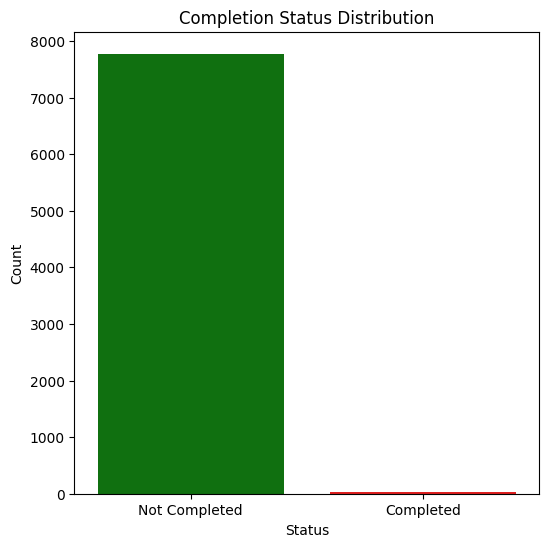

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Completion rate analysis
completion_statuses = ["Rewards Award"]
df["Completion Status"] = df["Status Description"].apply(lambda x: "Completed" if x in completion_statuses else "Not Completed")

# Plot completion rates
plt.figure(figsize=(6, 6))
sns.countplot(data=df, x="Completion Status",hue="Completion Status", palette=["green", "red"])
plt.title("Completion Status Distribution")
plt.xlabel("Status")
plt.ylabel("Count")
plt.show()


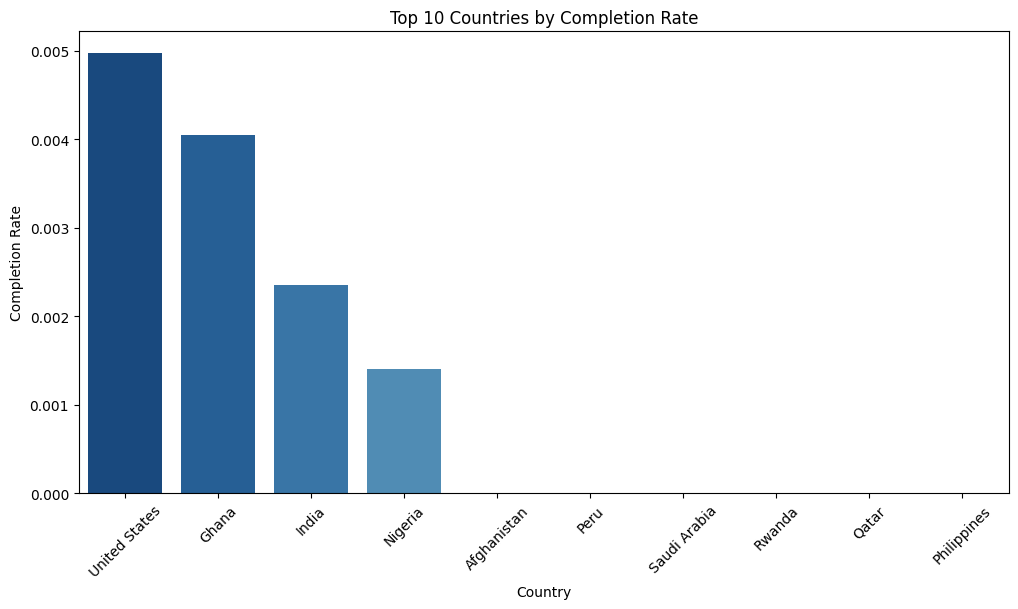

In [10]:
# Country-wise completion rate
country_completion = df.groupby("Country")["Completion Status"].value_counts(normalize=True).unstack().fillna(0)

# Sort by highest completion rate
top_countries = country_completion.sort_values(by="Completed", ascending=False).head(10)

# Plot top 10 countries by completion rate
plt.figure(figsize=(12, 6))
sns.barplot(x=top_countries.index, y=top_countries["Completed"], hue=top_countries.index, palette="Blues_r", legend=False)
plt.xticks(rotation=45)
plt.xlabel("Country")
plt.ylabel("Completion Rate")
plt.title("Top 10 Countries by Completion Rate")
plt.show()


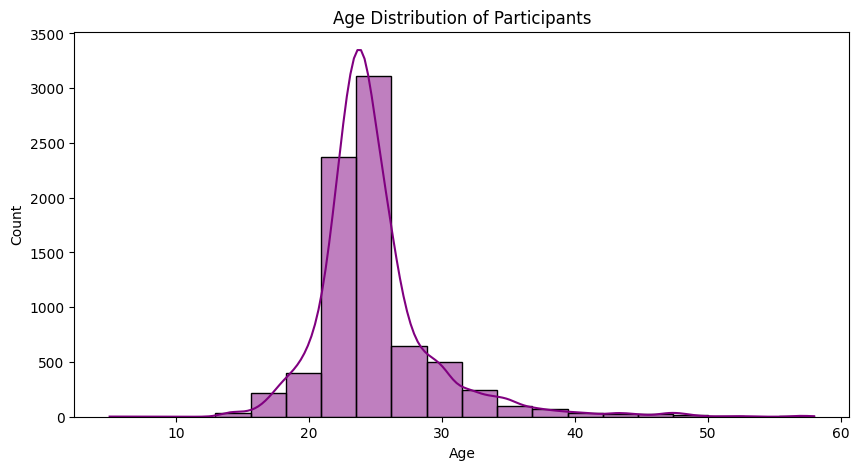

In [17]:
# Age distribution analysis
plt.figure(figsize=(10, 5))
sns.histplot(df["Age"], bins=20, kde=True, color="purple")
plt.xlabel("Age")
plt.ylabel("Count")
plt.title("Age Distribution of Participants")
plt.show()


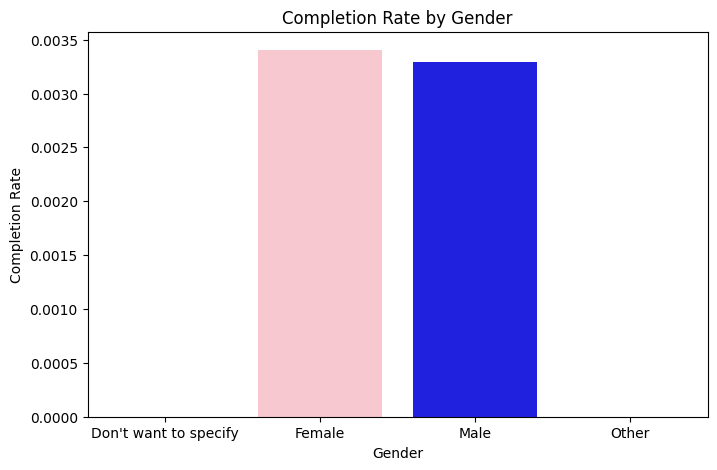

In [27]:
# Gender-based completion rates
# Step 1: Calculate Completion Rate by Gender
gender_completion = df.groupby("Gender")["Completion Status"].value_counts(normalize=True).unstack().fillna(0)

# Step 2: Define a Dynamic Color Palette
palette = {
    "Male": "blue",
    "Female": "pink",
    "Other": "black",
    "Don't want to specify": "gray"
}

# Step 3: Plot Gender-Based Completion Rates
plt.figure(figsize=(8, 5))
sns.barplot(
    data=gender_completion.reset_index(),
    x="Gender",
    y="Completed",
    hue="Gender",
    palette=palette,
    legend=False
)

# Step 4: Formatting
plt.xlabel("Gender")
plt.ylabel("Completion Rate")
plt.title("Completion Rate by Gender")
plt.show()
